In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc

import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
'''def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'/content/drive/MyDrive/Study/Dacon/Jeju/{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

csv_to_parquet('/content/drive/MyDrive/Study/Dacon/Jeju/train.csv', 'train')
csv_to_parquet('/content/drive/MyDrive/Study/Dacon/Jeju/test.csv', 'test')'''

"def csv_to_parquet(csv_path, save_name):\n    df = pd.read_csv(csv_path)\n    df.to_parquet(f'/content/drive/MyDrive/Study/Dacon/Jeju/{save_name}.parquet')\n    del df\n    gc.collect()\n    print(save_name, 'Done.')\n\ncsv_to_parquet('/content/drive/MyDrive/Study/Dacon/Jeju/train.csv', 'train')\ncsv_to_parquet('/content/drive/MyDrive/Study/Dacon/Jeju/test.csv', 'test')"

In [7]:
train_df = pd.read_parquet('/content/drive/MyDrive/Study/Dacon/Jeju/train.parquet')
test_df = pd.read_parquet('/content/drive/MyDrive/Study/Dacon/Jeju/test.parquet')
info_df = pd.read_csv('/content/drive/MyDrive/Study/Dacon/Jeju/data_info.csv')

In [8]:
train_df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [9]:
train_df['target'].unique()

array([ 52.,  30.,  61.,  20.,  38.,  28.,  39.,  14.,  47.,  40.,  60.,
        58.,  32.,  35.,  50.,  56.,  46.,  21.,  70.,  37.,  33.,  54.,
        31.,  49.,  59.,  75.,  36.,  26.,  24.,  10.,  22.,  53.,  45.,
        77.,  57.,  48.,  66.,  41.,  51.,  44.,  23.,  73.,  18.,  29.,
        62.,  43.,  55.,  74.,  25.,  19.,  78.,  65.,  17.,  64.,  27.,
        42.,  72.,  71.,  13.,  16.,  34.,  15.,  67.,  85.,   9.,  81.,
        11.,  82.,  63.,   7.,  76.,  69.,  80.,  68.,  12.,  84.,  88.,
        79.,  87.,   6.,  83.,   8.,   5.,  86.,   3.,   4.,   2.,   1.,
        96., 112.,  93.,  94.,  92.,  91.,  90.,  99.,  89.,  97.,  95.,
       113.,  98., 103.])

In [10]:
train_df['target'].max()

113.0

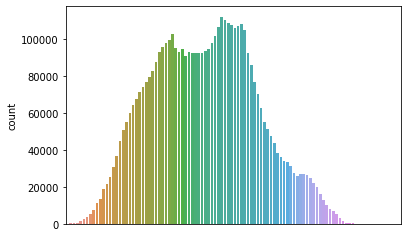

In [11]:

sns.countplot(
    data = train_df,
    x = 'target'
)
plt.gca().axes.xaxis.set_visible(False)
plt.show()

In [12]:
for i in range(1,26):
    print(f'target이 {i} 이하 일때 비율',end=' :')
    print(round((train_df[train_df['target']<=i]['id'].count())/train_df['id'].count()*100,2),'%')

target이 1 이하 일때 비율 :0.0 %
target이 2 이하 일때 비율 :0.0 %
target이 3 이하 일때 비율 :0.01 %
target이 4 이하 일때 비율 :0.03 %
target이 5 이하 일때 비율 :0.06 %
target이 6 이하 일때 비율 :0.11 %
target이 7 이하 일때 비율 :0.19 %
target이 8 이하 일때 비율 :0.3 %
target이 9 이하 일때 비율 :0.46 %
target이 10 이하 일때 비율 :0.7 %
target이 11 이하 일때 비율 :0.98 %
target이 12 이하 일때 비율 :1.38 %
target이 13 이하 일때 비율 :1.84 %
target이 14 이하 일때 비율 :2.38 %
target이 15 이하 일때 비율 :3.03 %
target이 16 이하 일때 비율 :3.82 %
target이 17 이하 일때 비율 :4.76 %
target이 18 이하 일때 비율 :5.85 %
target이 19 이하 일때 비율 :7.02 %
target이 20 이하 일때 비율 :8.3 %
target이 21 이하 일때 비율 :9.66 %
target이 22 이하 일때 비율 :11.09 %
target이 23 이하 일때 비율 :12.61 %
target이 24 이하 일때 비율 :14.18 %
target이 25 이하 일때 비율 :15.82 %


target이 20 이하 인 경우에 비율이 7%이하 임을 볼 수 있다.

In [13]:
for i in range(60,114,2):
    print(f'target이 {i} 이상 일때 비율',end=' :')
    print(round((train_df[train_df['target']>=i]['id'].count())/train_df['id'].count()*100,2),'%')

target이 60 이상 일때 비율 :14.89 %
target이 62 이상 일때 비율 :12.38 %
target이 64 이상 일때 비율 :10.28 %
target이 66 이상 일때 비율 :8.54 %
target이 68 이상 일때 비율 :7.04 %
target이 70 이상 일때 비율 :5.67 %
target이 72 이상 일때 비율 :4.53 %
target이 74 이상 일때 비율 :3.39 %
target이 76 이상 일때 비율 :2.3 %
target이 78 이상 일때 비율 :1.4 %
target이 80 이상 일때 비율 :0.78 %
target이 82 이상 일때 비율 :0.39 %
target이 84 이상 일때 비율 :0.13 %
target이 86 이상 일때 비율 :0.03 %
target이 88 이상 일때 비율 :0.01 %
target이 90 이상 일때 비율 :0.0 %
target이 92 이상 일때 비율 :0.0 %
target이 94 이상 일때 비율 :0.0 %
target이 96 이상 일때 비율 :0.0 %
target이 98 이상 일때 비율 :0.0 %
target이 100 이상 일때 비율 :0.0 %
target이 102 이상 일때 비율 :0.0 %
target이 104 이상 일때 비율 :0.0 %
target이 106 이상 일때 비율 :0.0 %
target이 108 이상 일때 비율 :0.0 %
target이 110 이상 일때 비율 :0.0 %
target이 112 이상 일때 비율 :0.0 %


68km 이상인 비율이 약7%임을 볼 수 있다.

In [14]:
train_df.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [15]:
info_df

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


## 전처리 과정에서 제거할 요인들

- 시작지점명, 도착지점명 : 중간에 도로에서의 속도가 주요할 것같아서 일단 배제한 후 훈련
- id, 날짜 : 요일이라는 요소가 따로 있기 때문에 아주 중요한 요소는 아닐거라 판단된다.
- 통과제한차량 : 통과 제한 차량이 유의미한 결론을 내지 못할 거라 판단된다.
- 도로사용여부 : 공지사항
- target : 이상치로 나타날 요인들을 제거할 필요가 있음

In [16]:
# train_df 에서 20<=target<=68 값만 추려냄

train_df.loc[train_df['target'] <= 20, 'target'] = 20
train_df.loc[train_df['target'] >= 68, 'target'] = 68

In [17]:
train_df['target'].unique()

array([52., 30., 61., 20., 38., 28., 39., 47., 40., 60., 58., 32., 35.,
       50., 56., 46., 21., 68., 37., 33., 54., 31., 49., 59., 36., 26.,
       24., 22., 53., 45., 57., 48., 66., 41., 51., 44., 23., 29., 62.,
       43., 55., 25., 65., 64., 27., 42., 34., 67., 63.])

In [18]:
train_df2 = train_df.drop(['start_node_name','end_node_name','vehicle_restricted','base_date','id','road_name'],axis=1)

In [19]:
train_df2.corr()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_hour,1.000000,-0.029194,0.031658,0.005711,-0.002649,-0.036756,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159030
lane_count,-0.029194,1.000000,-0.095717,-0.026555,-0.029290,0.384002,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.153972
road_rating,0.031658,-0.095717,1.000000,0.024218,-0.054160,-0.327474,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.256390
multi_linked,0.005711,-0.026555,0.024218,1.000000,-0.001111,-0.020245,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.007899
connect_code,-0.002649,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.051515
maximum_speed_limit,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.422029
weight_restricted,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.288110
height_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road_type,-0.007880,-0.050715,-0.125618,0.042977,-0.025846,0.059511,0.792803,NaN,1.000000,-0.043420,0.033684,-0.043430,0.033664,0.196265
start_latitude,-0.021599,0.182674,-0.204793,-0.014906,0.036623,0.253147,-0.128291,NaN,-0.043420,1.000000,0.127042,0.999106,0.127005,0.047468


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
test_df2 = test_df.drop(['start_node_name','end_node_name','vehicle_restricted','base_date','id','road_name'],axis=1)

In [22]:
train_df2.loc[train_df2['start_turn_restricted'] =='있음','start_turn_restricted'] = 'start_turn_restricted 있음'
train_df2.loc[train_df2['start_turn_restricted'] =='없음','start_turn_restricted'] = 'start_turn_restricted 없음'

train_df2.loc[train_df2['end_turn_restricted'] =='있음','end_turn_restricted'] = 'end_turn_restricted 있음'
train_df2.loc[train_df2['end_turn_restricted'] =='없음','end_turn_restricted'] = 'end_turn_restricted 없음'


test_df2.loc[test_df2['start_turn_restricted'] =='있음','start_turn_restricted'] = 'start_turn_restricted 있음'
test_df2.loc[test_df2['start_turn_restricted'] =='없음','start_turn_restricted'] = 'start_turn_restricted 없음'

test_df2.loc[test_df2['end_turn_restricted'] =='있음','end_turn_restricted'] = 'end_turn_restricted 있음'
test_df2.loc[test_df2['end_turn_restricted'] =='없음','end_turn_restricted'] = 'end_turn_restricted 없음'

In [23]:
tmd = ['day_of_week', 'start_turn_restricted', 'end_turn_restricted']
for i in tmd:
    pd_df = pd.get_dummies(train_df2[i])
    train_df2 = pd.concat([train_df2, pd_df], axis=1)
    train_df2 = train_df2.drop([i],axis=1)

    pd_df = pd.get_dummies(test_df2[i])
    test_df2 = pd.concat([test_df2, pd_df], axis=1)
    test_df2 = test_df2.drop([i],axis=1)


In [24]:
train_df2

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,road_type,start_latitude,...,목,수,월,일,토,화,start_turn_restricted 없음,start_turn_restricted 있음,end_turn_restricted 없음,end_turn_restricted 있음
0,17,1,106,0,0,60.0,32400.0,0.0,3,33.427747,...,1,0,0,0,0,0,1,0,1,0
1,21,2,103,0,0,60.0,0.0,0.0,0,33.500730,...,1,0,0,0,0,0,0,1,1,0
2,7,2,103,0,0,80.0,0.0,0.0,0,33.279145,...,0,0,0,1,0,0,1,0,1,0
3,13,2,107,0,0,50.0,0.0,0.0,0,33.246081,...,0,0,0,0,0,0,1,0,1,0
4,8,2,103,0,0,80.0,0.0,0.0,0,33.462214,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0.0,0,33.422145,...,1,0,0,0,0,0,1,0,1,0
4701213,2,2,107,0,0,80.0,43200.0,0.0,3,33.472505,...,1,0,0,0,0,0,1,0,1,0
4701214,22,2,103,0,0,60.0,0.0,0.0,0,33.447183,...,0,0,1,0,0,0,1,0,1,0
4701215,2,2,103,0,0,80.0,0.0,0.0,0,33.443596,...,0,1,0,0,0,0,1,0,1,0


In [25]:
y_train = train_df2['target']
x_train = train_df2.drop(['target'],axis=1)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(test_df2.shape)

(4701217, 24)
(4701217,)
(291241, 24)


In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
import lightgbm as lgb


In [29]:
import time
start_time = time.time()
total_time = start_time
# model_gb = GradientBoostingRegressor(learning_rate=0.01).fit(x_train, y_train)
# now = time.time()
# print(f'gb 끝 : \n걸린시간 : {(now-start_time)/60:.3f}분' )

# start_time = time.time()
# model_xgb = xgb.XGBRegressor().fit(x_train, y_train)
# now = time.time()
# print(f'xgb 끝 : \n걸린시간 : {(now-start_time)/60:.3f}분' )

start_time = time.time()
model_lgb = lgb.LGBMRegressor().fit(x_train, y_train)
now = time.time()
print(f'lgb 끝 : \n걸린시간 : {(now-start_time)/60:.3f}분' )

# start_time = time.time()
# model_rf = RandomForestRegressor().fit(x_train, y_train)
# now = time.time()
# print(f'rf 끝 : \n걸린시간 : {(now-start_time)/60:.3f}분' )
# print(f'fit 완료\n총 걸린시간 : {(now-total_time)/60:.3f}분')

gb 끝 : 
걸린시간 : 18.802분
[05:35:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:47] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
xgb 끝 : 
걸린시간 : 23.829분
lgb 끝 : 
걸린시간 : 0.972분
rf 끝 : 
걸린시간 : 47.829분
fit 완료
총 걸린시간 : 91.432분


In [31]:
# pred_gb = model_gb.predict(test_df2)
# pred_xgb = model_xgb.predict(test_df2)
pred_lgb = model_lgb.predict(test_df2)
# pred_rf = model_rf.predict(test_df2)



In [32]:
# sample_submission1 = pd.read_csv('/content/drive/MyDrive/Study/Dacon/Jeju/sample_submission.csv')
# sample_submission1['target'] = model_gb.predict(test_df2)
# sample_submission1.to_csv("/content/drive/MyDrive/Study/Dacon/Jeju/DATA/submit1.csv", index = False)

# sample_submission2 = pd.read_csv('/content/drive/MyDrive/Study/Dacon/Jeju/sample_submission.csv')
# sample_submission2['target'] = model_xgb.predict(test_df2)
# sample_submission2.to_csv("/content/drive/MyDrive/Study/Dacon/Jeju/DATA/submit2.csv", index = False)

sample_submission3 = pd.read_csv('/content/drive/MyDrive/Study/Dacon/Jeju/sample_submission.csv')
sample_submission3['target'] = model_lgb.predict(test_df2)
sample_submission3.to_csv("/content/drive/MyDrive/Study/Dacon/Jeju/DATA/submit3.csv", index = False)

# sample_submission4 = pd.read_csv('/content/drive/MyDrive/Study/Dacon/Jeju/sample_submission.csv')
# sample_submission4['target'] = model_rf.predict(test_df2)
# sample_submission4.to_csv("/content/drive/MyDrive/Study/Dacon/Jeju/DATA/submit4.csv", index = False)

In [34]:
# # 4개 전체 앙상블
# sample_submission5 = pd.read_csv('/content/drive/MyDrive/Study/Dacon/Jeju/sample_submission.csv')
# sample_submission5['target'] = (model_xgb.predict(test_df2) + model_gb.predict(test_df2) + model_lgb.predict(test_df2) + model_rf.predict(test_df2))/4
# sample_submission5.to_csv("/content/drive/MyDrive/Study/Dacon/Jeju/DATA/submit5.csv", index = False)

In [35]:
# # 3개 앙상블
# sample_submission6 = pd.read_csv('/content/drive/MyDrive/Study/Dacon/Jeju/sample_submission.csv')
# sample_submission6['target'] = (model_xgb.predict(test_df2) + model_gb.predict(test_df2) + model_lgb.predict(test_df2))/3
# sample_submission6.to_csv("/content/drive/MyDrive/Study/Dacon/Jeju/DATA/submit6.csv", index = False)